# 基于卷积神经网络的手写英文字母识别系统研究

In [1]:
from utils import *

#### 数据展示

训练集每个类别样本数：
类别 A: 1400
类别 B: 1400
类别 C: 1400
类别 D: 1400
类别 E: 1400
类别 F: 1400
类别 G: 1400
类别 H: 1400
类别 I: 1400
类别 J: 1400
类别 K: 1400
类别 L: 1400
类别 M: 1400
类别 N: 1400
类别 O: 1400
类别 P: 1400
类别 Q: 1400
类别 R: 1400
类别 S: 1400
类别 T: 1400
类别 U: 1400
类别 V: 1400
类别 W: 1400
类别 X: 1400
类别 Y: 1400
类别 Z: 1400
类别 a_: 1400
类别 b_: 1400
类别 d_: 1400
类别 e_: 1400
类别 f_: 1400
类别 g_: 1400
类别 h_: 1400
类别 n_: 1400
类别 q_: 1400
类别 r_: 1400
类别 t_: 1400

验证集每个类别样本数：
类别 A: 300
类别 B: 300
类别 C: 300
类别 D: 300
类别 E: 300
类别 F: 300
类别 G: 300
类别 H: 300
类别 I: 300
类别 J: 300
类别 K: 300
类别 L: 300
类别 M: 300
类别 N: 300
类别 O: 300
类别 P: 300
类别 Q: 300
类别 R: 300
类别 S: 300
类别 T: 300
类别 U: 300
类别 V: 300
类别 W: 300
类别 X: 300
类别 Y: 300
类别 Z: 300
类别 a_: 300
类别 b_: 300
类别 d_: 300
类别 e_: 300
类别 f_: 300
类别 g_: 300
类别 h_: 300
类别 n_: 300
类别 q_: 300
类别 r_: 300
类别 t_: 300

测试集每个类别样本数：
类别 A: 300
类别 B: 300
类别 C: 300
类别 D: 300
类别 E: 300
类别 F: 300
类别 G: 300
类别 H: 300
类别 I: 300
类别 J: 300
类别 K: 300
类别 L: 300
类别 M: 300
类别 N: 300
类别 O: 300
类别 P: 300
类别 

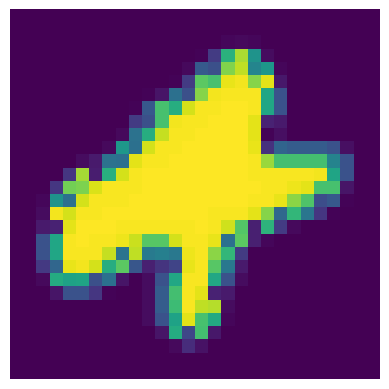

In [2]:
transform = AlbumentationsTransformBase()  # 不使用数据增强

ROOT_DIR = "emnist_png_balanced"  # 数据集路径
BATCH_SIZE = 256  # 批大小
EPOCH = 500  # 训练轮数
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")# 设备选择
LR = 1e-4  # 学习率

train_loader, val_loader, test_loader, full_dataset = split_dataset(
    root_dir=ROOT_DIR,
    transform=transform,
    train_ratio=0.7,
    val_ratio=0.15,
    test_ratio=0.15,
    batch_size=BATCH_SIZE,
    shuffle=True,
    random_seed=42,
)

# 打印数据集大小
print(f"训练集大小: {len(train_loader.dataset)}")
print(f"验证集大小: {len(val_loader.dataset)}")
print(f"测试集大小: {len(test_loader.dataset)}")

# 获取类别数量
label_num = len(full_dataset.class_to_idx)

# 数据可视化
to_img = T.ToPILImage()
a = to_img(train_loader.dataset[0][0])  # size=[1, 32, 32]
plt.imshow(a)
plt.axis('off')
plt.show()

In [ ]:
model = CNNWithAttention(label_num, use_attention=True) # 调用模型

train_and_validate(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=EPOCH,
    device=device,
    save_path="cnn_res_attention_noaug_best.pth",
    lr=LR
)

Epoch [1/500] Loss: 3.3567, Train Top-1 Acc: 0.1270, Train Top-3 Acc: 0.2883, Val Top-1 Acc: 0.3254, Val Top-3 Acc: 0.6117
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.3254
Epoch [2/500] Loss: 2.4861, Train Top-1 Acc: 0.3602, Train Top-3 Acc: 0.6502, Val Top-1 Acc: 0.5970, Val Top-3 Acc: 0.8549
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.5970
Epoch [3/500] Loss: 1.7093, Train Top-1 Acc: 0.5488, Train Top-3 Acc: 0.8339, Val Top-1 Acc: 0.7262, Val Top-3 Acc: 0.9159
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.7262
Epoch [4/500] Loss: 1.2004, Train Top-1 Acc: 0.6759, Train Top-3 Acc: 0.9086, Val Top-1 Acc: 0.7819, Val Top-3 Acc: 0.9462
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.7819


### 无注意力机制 无数据增强

In [ ]:
model = CNNWithAttention(label_num, use_attention=False) # 调用模型

train_and_validate(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=EPOCH,
    device=device,
    save_path="cnn_res_noattention_noaug_best.pth",
    lr=LR
)